In [62]:
import numpy as np

num_samples_per_class = 1000
neg_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)
pos_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

In [63]:
inputs = np.vstack((neg_samples, pos_samples)).astype(np.float32)

In [64]:
#generate targets
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                    np.ones((num_samples_per_class, 1), dtype="float32")))

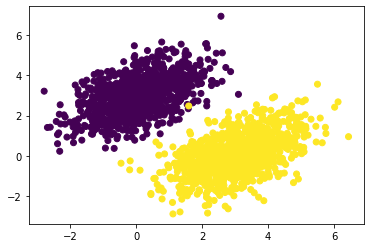

In [65]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [66]:
import tensorflow as tf

#prepare a linear classifier, that is based on
#prediction = W * input + b

#creating variables
#input is 2D data
input_dim = 2
#output is single value close to 0 or close to 1
output_dim = 1
#weights
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim, output_dim)))
#bias
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim, )))

In [67]:
#set up forward pass function
def model(inputs):
    #below function calculates w1*x + w2*y + b
    return tf.matmul(inputs, W) + b

In [68]:
#set up mean squared error loss function
def square_loss(targets, predictions):
    #per_sample_losses is a tensor with same shape like targets and predictions
    #containing loss scores per sample
    per_sample_losses = tf.square(targets - predictions)
    #get an average of the per sample losses
    return tf.reduce_mean(per_sample_losses)

In [69]:
#implement one training step, that updates weights and bias in order to minimize loss on data
learning_rate = 0.1

def training_step(inputs, targets):
    #forward pass, inside a gradient tape scope
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    #retrieve gradient of loss with regard to weights and bias
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    #update weights and bias
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

Loss at step 0: 5.4061


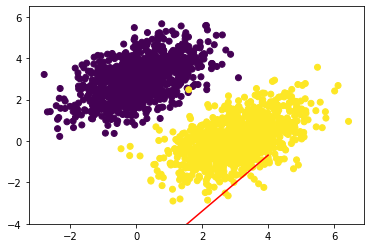

Loss at step 1: 0.4899


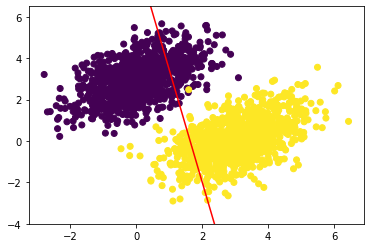

Loss at step 2: 0.1753


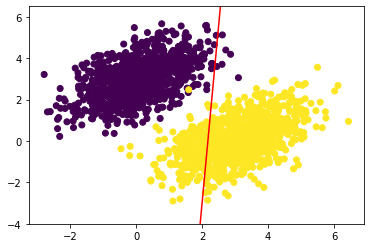

Loss at step 3: 0.1227


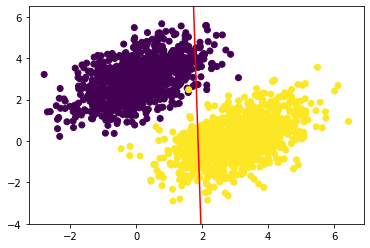

Loss at step 4: 0.1088


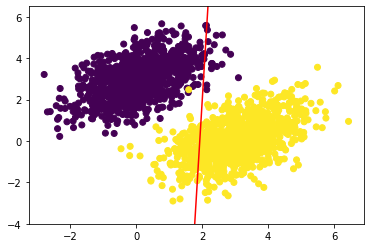

Loss at step 5: 0.1009


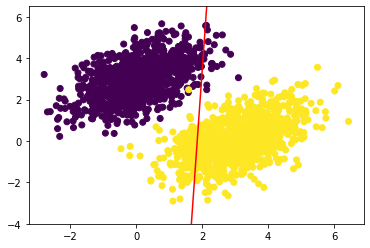

Loss at step 6: 0.0945


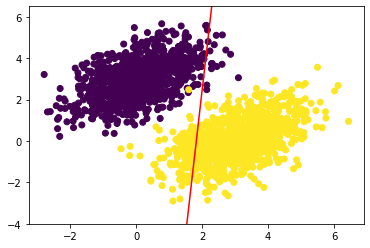

Loss at step 7: 0.0886


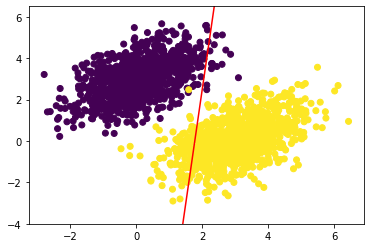

Loss at step 8: 0.0833


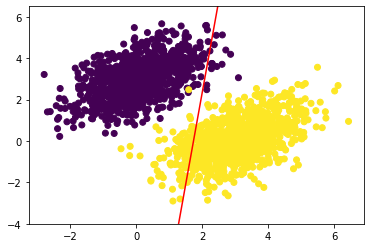

Loss at step 9: 0.0784


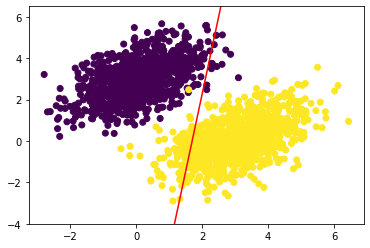

Loss at step 10: 0.0739


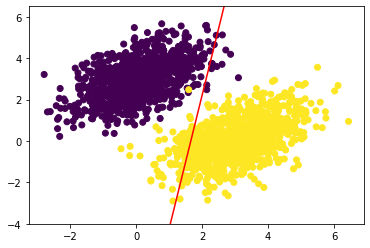

Loss at step 11: 0.0698


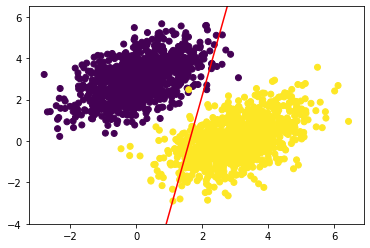

Loss at step 12: 0.0660


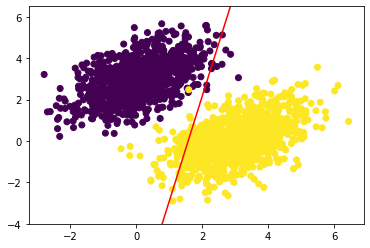

Loss at step 13: 0.0626


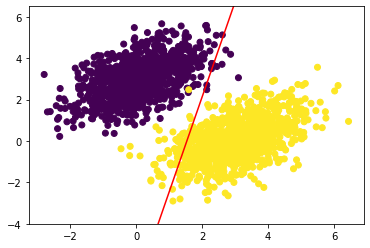

Loss at step 14: 0.0594


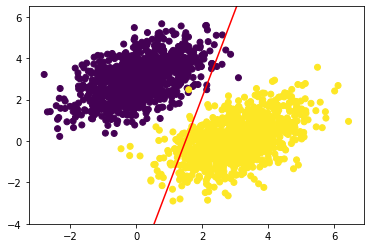

Loss at step 15: 0.0565


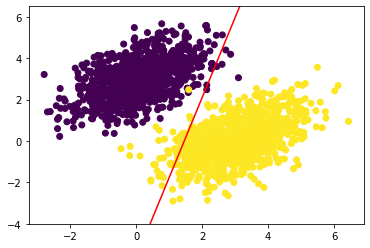

Loss at step 16: 0.0538


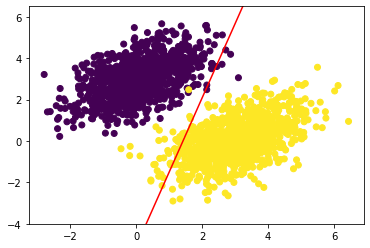

Loss at step 17: 0.0514


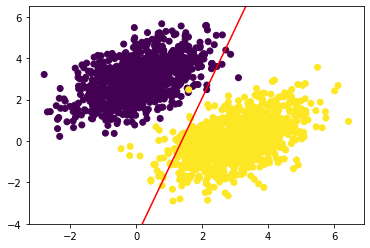

Loss at step 18: 0.0491


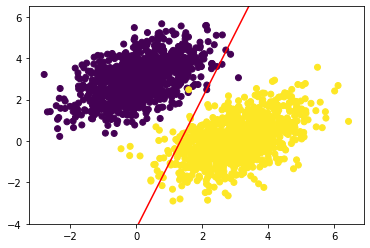

Loss at step 19: 0.0470


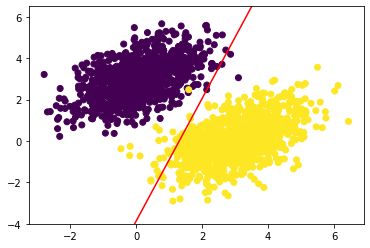

Loss at step 20: 0.0451


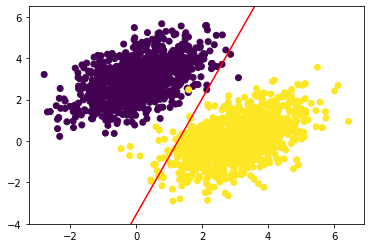

Loss at step 21: 0.0434


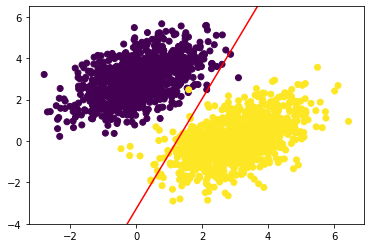

Loss at step 22: 0.0418


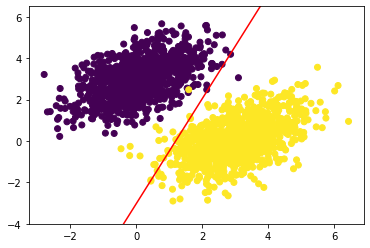

Loss at step 23: 0.0403


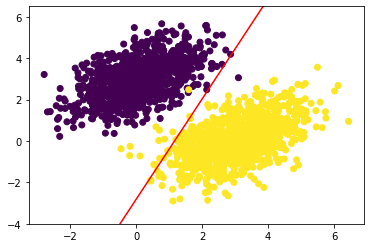

Loss at step 24: 0.0390


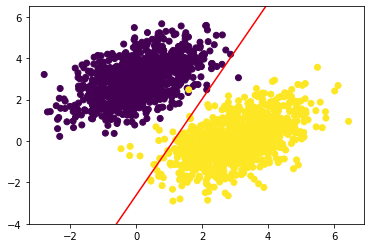

Loss at step 25: 0.0378


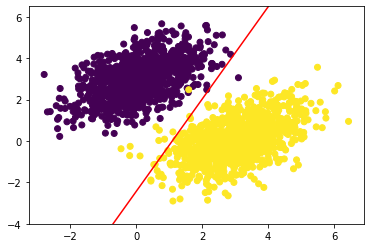

Loss at step 26: 0.0366


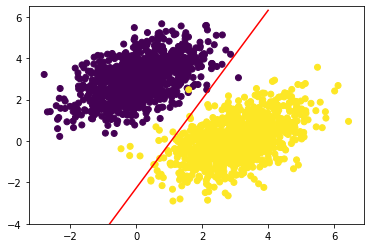

Loss at step 27: 0.0356


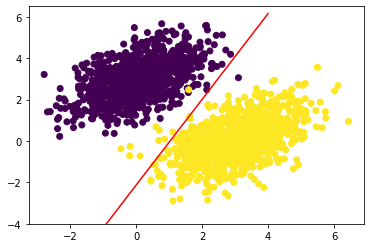

Loss at step 28: 0.0347


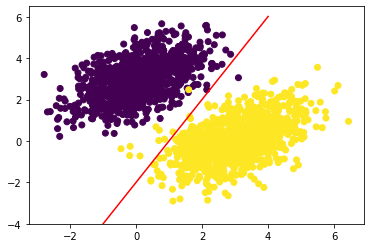

Loss at step 29: 0.0338


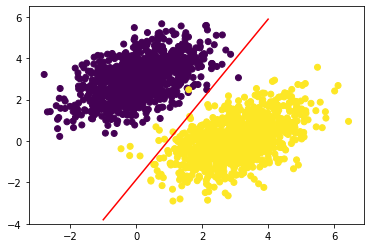

Loss at step 30: 0.0330


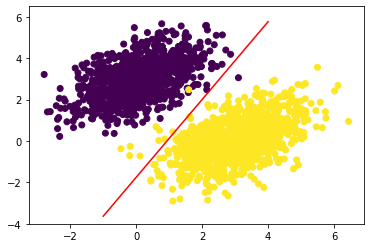

Loss at step 31: 0.0322


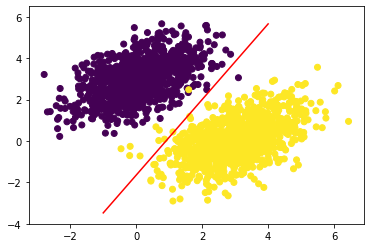

Loss at step 32: 0.0316


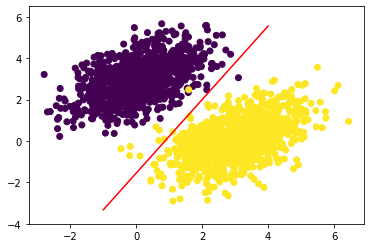

Loss at step 33: 0.0309


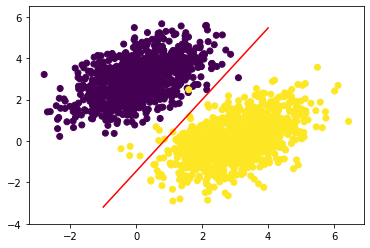

Loss at step 34: 0.0304


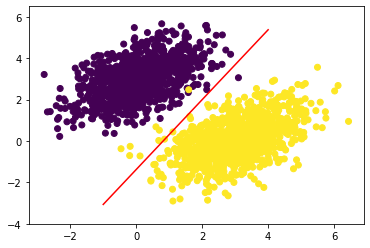

Loss at step 35: 0.0299


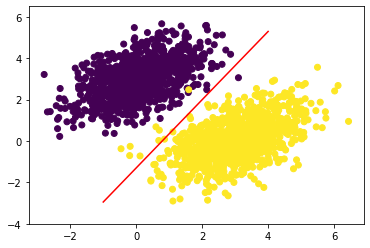

Loss at step 36: 0.0294


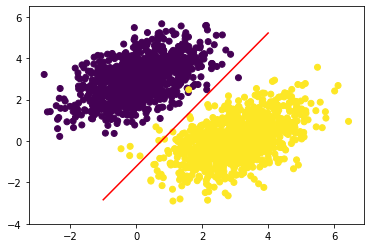

Loss at step 37: 0.0289


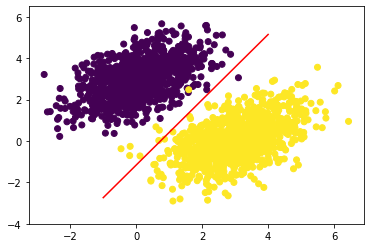

Loss at step 38: 0.0285


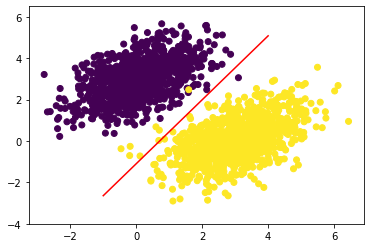

Loss at step 39: 0.0282


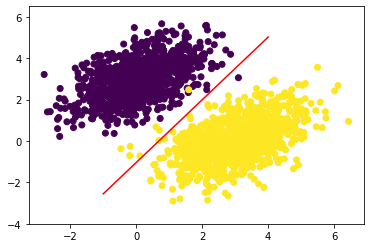

In [70]:
#batch training loop
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")
    x = np.linspace(-1, 4, 100)
    plt.ylim(-4,6.5)
    y = - W[0] / W[1] * x + (0.5 - b) / W[1]
    plt.plot(x, y, '-r', label='y=2x+1')
    #plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
    plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
    plt.show()

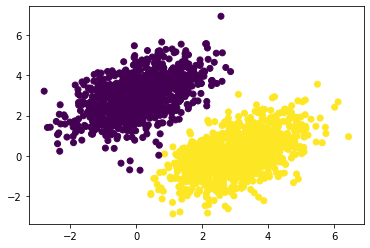

In [71]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [72]:
W

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.18284142],
       [-0.12077853]], dtype=float32)>

In [73]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.3743956], dtype=float32)>

In [74]:
#https://scriptverse.academy/tutorials/python-matplotlib-plot-straight-line.html
#https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot

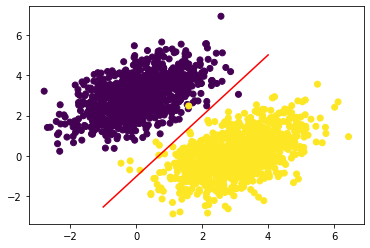

In [77]:
#draw a decision boundary
#generate 100 numbers between -1 and 4
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r', label='y=2x+1')
#plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()